In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [127]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=32)

In [128]:
X

array([[ 7.96779548, -1.78987573],
       [ 7.17117209, -1.54034981],
       [ 2.93021477,  5.57337918],
       ...,
       [ 7.34040312, -1.38966147],
       [ 1.50123386,  7.30147865],
       [ 3.49124237,  6.09818886]])

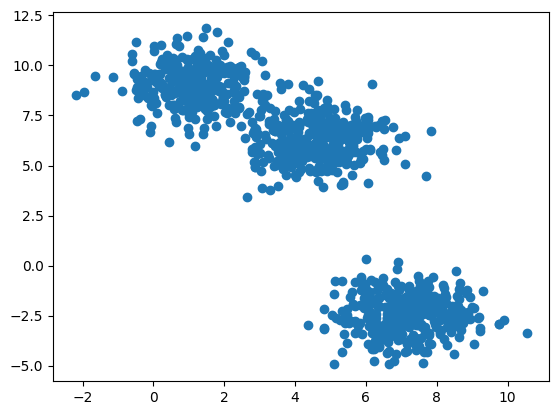

In [129]:
plt.scatter(X[:,0],X[:,1])

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state=32)

In [131]:
from sklearn.cluster import KMeans

In [132]:
## elbow method to find the K value
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [133]:
wcss

[22879.989159593388,
 3663.751498387496,
 1357.6679432382402,
 1171.0287889489732,
 1017.6107403092623,
 908.2094536113771,
 797.7039936858064,
 679.4836027988194,
 610.2225530371281,
 560.8290998840448]

Text(0.5, 0, 'WCSS')

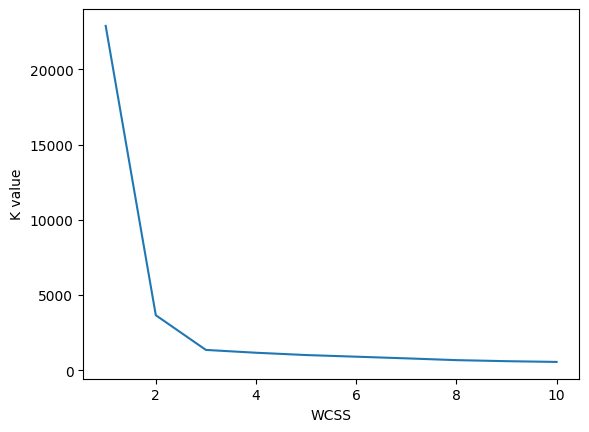

In [134]:

fig, ax = plt.subplots()
ax.plot(range(1,11), wcss)
ax.set_ylabel('K value')
ax.set_xlabel('WCSS')

In [135]:
model1 = KMeans(n_clusters = 3, init = "k-means++")

In [136]:
y_labels  = model1.fit(X_train)

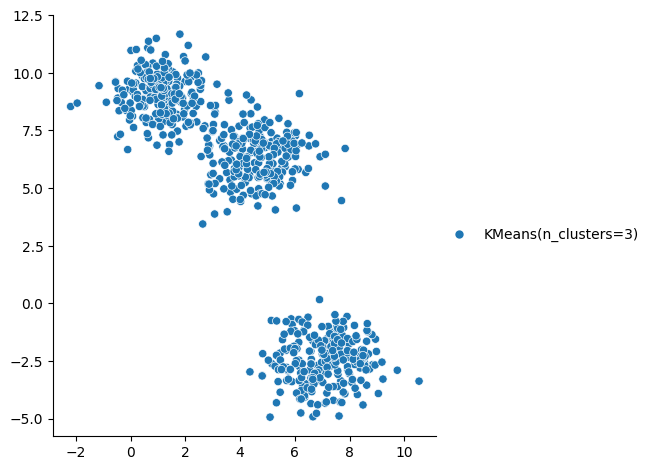

In [140]:
sns.relplot(x=X_train[:,0],y= X_train[:,1], kind = 'scatter', hue = y_labels)
plt.show()


In [138]:
type(y_labels)

sklearn.cluster._kmeans.KMeans

TypeError: float() argument must be a string or a real number, not 'KMeans'

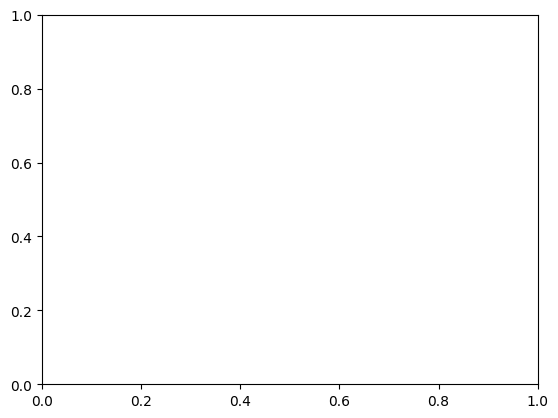

In [139]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data')
plt.show()

In [142]:
from kneed import KneeLocator

In [143]:
k1 = KneeLocator(range(1,11),wcss, curve = 'convex', direction= 'decreasing')

In [144]:
k1.elbow

2

In [145]:
## silhoutte scoring
from sklearn.metrics import silhouette_score